# Step-1: read the data sets in JSON format one by one

1. First find the  useful field that needs to be extracted, and create an extraction function.

2. It should be noted that because a single file is too large, it cannot be read at once (memory error), and can only be extracted separately and then merged.

3. Save the extracted JSON data as a PKL file for easy reading next time.

In [2]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [163]:
os.chdir(r'D:\dataset')
file = '2020-04-01.json'

In [3]:
# read the first line of the file, load into a dictionary and print the result，find useful info in this dataset
with open(file, "r") as f:
    line = f.readline()
    data = json.loads(line)
    test = data
    print(data)

{'quote_count': 0, 'contributors': None, 'truncated': True, 'text': '@Politidope @LittelSea @johnrobertsFox Holy Hypocrisy, Batman!   The same asshole that retweets fake tweets &amp; propa… https://t.co/8CzHJq85R2', 'is_quote_status': False, 'in_reply_to_status_id': 1245492665606643712, 'reply_count': 0, 'id': 1245501194602196992, 'favorite_count': 0, 'place': None, 'created_at_src': 'Wed Apr 01 23:59:59 +0000 2020', 'collected_by': 'sentinelRibTwitter', 'retweeted': False, 'in_reply_to_status_id_str': '1245492665606643712', 'coordinates': None, 'timestamp_ms': '1585785599743', 'entities': {'emotion': [], 'user_mentions': [{'indices': [0, 11], 'id_str': '113724715', 'id': 113724715, 'name': 'Politidope', 'screen_name': 'Politidope'}, {'indices': [12, 22], 'id_str': '750529765', 'id': 750529765, 'name': '🚣\u200d♀️ *Little Sea*', 'screen_name': 'LittelSea'}, {'indices': [23, 38], 'id_str': '20975060', 'id': 20975060, 'name': 'John Roberts', 'screen_name': 'johnrobertsFox'}], 'hashtags': 

In [4]:
#Test if JSON is successfully read
test

{'quote_count': 0,
 'contributors': None,
 'truncated': True,
 'text': '@Politidope @LittelSea @johnrobertsFox Holy Hypocrisy, Batman!   The same asshole that retweets fake tweets &amp; propa… https://t.co/8CzHJq85R2',
 'is_quote_status': False,
 'in_reply_to_status_id': 1245492665606643712,
 'reply_count': 0,
 'id': 1245501194602196992,
 'favorite_count': 0,
 'place': None,
 'created_at_src': 'Wed Apr 01 23:59:59 +0000 2020',
 'collected_by': 'sentinelRibTwitter',
 'retweeted': False,
 'in_reply_to_status_id_str': '1245492665606643712',
 'coordinates': None,
 'timestamp_ms': '1585785599743',
 'entities': {'emotion': [],
  'user_mentions': [{'indices': [0, 11],
    'id_str': '113724715',
    'id': 113724715,
    'name': 'Politidope',
    'screen_name': 'Politidope'},
   {'indices': [12, 22],
    'id_str': '750529765',
    'id': 750529765,
    'name': '🚣\u200d♀️ *Little Sea*',
    'screen_name': 'LittelSea'},
   {'indices': [23, 38],
    'id_str': '20975060',
    'id': 20975060,
    'na

In [5]:
#Find specific fields in JSON data
print(test['entities']['swearword'])
print(test['created_at_src'])

[{'start': 71, 'end': 78, 'id': 'SWEAR:0000019', 'match_text': 'asshole'}]
Wed Apr 01 23:59:59 +0000 2020


In [6]:
##Find specific fields in JSON data
print(test['user']['id'])

1161614744643657728


In [7]:
##Find specific fields in JSON data
print(test['entities']['urls'][0]['expanded_url'])

https://twitter.com/i/web/status/1245501194602196992


In [8]:
#Find specific fields in JSON data
print(test['entities']['sentiment'])

{'probabilities': {'Very positive': 0.061533737673516796, 'Positive': 0.082541051420243, 'Neutral': 0.12098655778484486, 'Very negative': 0.1907733783264746, 'Negative': 0.5441652747949206}, 'score': 1, 'scored_by': 'StanfordNLP'}


In [9]:
##Find specific fields in JSON data
print(test['entities']['classification'])

[{'score': 1, 'id': 'anger_cascading_naive-bayes_50-50:no', 'classification': 'no', 'scored_by': 'anger_cascading_naive-bayes_50-50'}, {'score': 0, 'id': 'anger_flat_naive-bayes_50-50:yes', 'classification': 'yes', 'scored_by': 'anger_flat_naive-bayes_50-50'}, {'score': 0, 'id': 'anger_none_naive-bayes_50-50:yes', 'classification': 'yes', 'scored_by': 'anger_none_naive-bayes_50-50'}]


In [10]:
#create funcation for loads JSON files
def data_load(JSON):
   #read each line of the file, extract relevant data to analysis
    with open(JSON, "r") as f:
        for line in f:
            
            data = json.loads(line)

            #infor for this tweet
            tweet_id = data['id_str']

            tweet_lang = data['lang']

            tweet_time =data['created_at_src']

            #tweet_favorite_count = data['favorite_count']

            #infor from who tweet this tweet
            
            user_id = data['user']['id']

            user_location = data['user']['location']

            user_friends_count = data['user']['friends_count']

            user_favourites_count = data['user']['favourites_count']

            user_followers_count = data['user']['followers_count']

            #retweet = data['retweet_count']

            # Extraction of important information
            if 'extended_tweet' in data:
                text = data['extended_tweet']['full_text']
            else:
                text = data['text']

            try:
                url = data['entities']['urls'][0]['expanded_url']
                classification =data['entities']['classification']  
                sentiment = data['entities']['sentiment']
                swearword = data['entities']['swearword']
            except:
                url = None
                classification = None
                sentiment = None
                swearword = None    
            rows.append((tweet_id,tweet_lang,tweet_time,user_id,user_location,
                         user_friends_count,user_favourites_count,user_followers_count, 
                         text,url,classification,sentiment,swearword))

In [11]:
#Convert rows to DataFrame
def data_tofile(file):
    data_load(file)
    df= pd.DataFrame(data=rows, columns=['tweet_id','tweet_lang','tweet_time','user_id','user_location',
         'user_friends_count','user_favourites_count','user_followers_count', 
         'text','url','classification','sentiment','swearword'])

    #save as file
    df.to_pickle(file+'.pkl')

In [12]:
#Create a list of JSON files
JSON = ['2020-03-25.json','2020-03-26.json','2020-03-27.json','2020-03-28.json','2020-03-29.json','2020-03-30.json',
        '2020-03-31.json','2020-04-01.json']

In [13]:
#Extract each JSON file using a loop
for i in JSON:
    rows=[]
    data_tofile(i)

# Step-2 Data preprocessing and cleaning

1. Combine PKL data into a DataFrame.

2. Pre-process the data and perform some necessary cleaning.

In [164]:
#Define the target file path
import glob
path = r'D:\dataset\2020-03-25 to 2020-04-01'
Files = glob.glob(path + "/*.pkl")

In [165]:
#Merge all PKL files
data_03_04 = []

for files in Files:
    df = pd.read_pickle(files)
    data_03_04.append(df)

data = pd.concat(data_03_04, ignore_index=True,axis=0)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082615 entries, 0 to 3082614
Data columns (total 13 columns):
tweet_id                 object
tweet_lang               object
tweet_time               object
user_id                  int64
user_location            object
user_friends_count       int64
user_favourites_count    int64
user_followers_count     int64
text                     object
url                      object
classification           object
sentiment                object
swearword                object
dtypes: int64(4), object(9)
memory usage: 305.7+ MB


In [167]:
data.head(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,classification,sentiment,swearword
0,1242964476669898754,en,Wed Mar 25 23:59:59 +0000 2020,811230404372004868,"Oklahoma, USA",984,9990,895,@marlenelooney You're wrong. I can tell becaus...,https://twitter.com/i/web/status/1242964476669...,"[{'score': 1, 'id': 'anger_cascading_naive-bay...",{'probabilities': {'Very positive': 0.04313527...,[]
1,1242964479769546753,pt,Wed Mar 25 23:59:59 +0000 2020,713751504730066944,"São Paulo, Brasil",48,40907,182,RT @RainhaCarminha: Os fãs do menino que grita...,None,None,None,None
2,1242964477974319104,en,Wed Mar 25 23:59:59 +0000 2020,22478091,None,928,100586,777,RT @realDonaldTrump: I hear that Fake News CNN...,None,None,None,None
3,1242964479622725634,en,Wed Mar 25 23:59:59 +0000 2020,351163022,United States,21,1665,125,RT @LizRNC: Very important point from Dr. Birx...,None,None,None,None
4,1242964480352333824,en,Wed Mar 25 23:59:59 +0000 2020,1072119649184051200,New Delhi,664,13052,53,RT @HarbirSinghNain: China is pressuring India...,None,None,None,None


In [168]:
data.tweet_lang.value_counts()

en     2442674
pt      247914
es      185628
fr       36047
it       32653
tl       24192
th       20001
in       14756
hi       13971
de       11415
tr       11052
ca        9345
pl        5179
nl        4495
und       4103
ja        3857
el        2983
zh        2481
sv        1453
et        1289
cs         942
ht         809
ur         660
ta         658
ro         568
ar         530
da         416
no         340
sl         310
eu         276
fi         241
lt         209
ko         203
lv         202
ru         128
gu          71
hu          70
iw          63
fa          56
mr          48
ml          48
bn          46
my          45
ne          41
cy          28
te          26
vi          23
sr          17
si          12
is           9
bg           8
am           6
kn           6
uk           5
or           5
ps           2
Name: tweet_lang, dtype: int64

In [169]:
#We are only focusing on data about English
data = data[data.tweet_lang == 'en']

In [170]:
data.user_id.value_counts()

886721547481874432     712
1178508394941931522    577
880757915132588032     450
840496870875045889     446
962764981627473921     441
                      ... 
821264047739801600       1
1216437322268454917      1
209404833                1
1178597332486512640      1
804613823856459777       1
Name: user_id, Length: 1056266, dtype: int64

In [171]:
data['tweet_time']

0          Wed Mar 25 23:59:59 +0000 2020
2          Wed Mar 25 23:59:59 +0000 2020
3          Wed Mar 25 23:59:59 +0000 2020
4          Wed Mar 25 23:59:59 +0000 2020
5          Wed Mar 25 23:59:59 +0000 2020
                        ...              
3082605    Wed Apr 01 00:00:01 +0000 2020
3082607    Wed Apr 01 00:00:00 +0000 2020
3082610    Wed Apr 01 00:00:00 +0000 2020
3082611    Wed Apr 01 00:00:00 +0000 2020
3082612    Wed Apr 01 00:00:00 +0000 2020
Name: tweet_time, Length: 2442674, dtype: object

In [172]:
#Replace the unused data in the time column
data.tweet_time = data.tweet_time.apply(lambda x : x.replace('+0000',''))

In [173]:
data.user_location.value_counts()

United States        70001
India                27619
USA                  24904
California, USA      18903
Texas, USA           17694
                     ...  
윈드                       1
Calamazoo                1
ambt                     1
she/they | ⓥ | 20        1
Crypto Commons           1
Name: user_location, Length: 212661, dtype: int64

In [174]:
data.url.value_counts()

https://news.yahoo.com/suspected-sars-virus-and-flu-found-in-luggage-fbi-report-describes-chinas-biosecurity-risk-144526820.html    9469
https://www.queerty.com/fox-news-purportedly-bracing-legal-bloodbath-peddling-coronavirus-misinformation-20200331                   5615
https://twitter.com/santucci/status/1243708703972433927                                                                             3608
https://gjarr.it/2wnSFVr                                                                                                            3525
https://twitter.com/greg_price11/status/1243677737761615872                                                                         3280
                                                                                                                                    ... 
https://twitter.com/i/web/status/1245363746102480896                                                                                   1
https://twitter.com/i/web/status/12437864

In [175]:
data.swearword.value_counts()

[]                                                                                                                                                       598734
[{'start': 63, 'end': 71, 'id': 'SWEAR:0000048', 'match_text': 'bullshit'}]                                                                                 582
[{'start': 109, 'end': 111, 'id': 'SWEAR:0000201', 'match_text': 'ho'}]                                                                                     191
[{'start': 113, 'end': 115, 'id': 'SWEAR:0000201', 'match_text': 'ho'}]                                                                                     107
[{'start': 112, 'end': 114, 'id': 'SWEAR:0000201', 'match_text': 'ho'}]                                                                                      96
                                                                                                                                                          ...  
[{'start': 79, 'end': 83, 'id': 'SWEAR:0

In [176]:
#The dictionary expands to the column of dataframe
df_sentiment_dict = data['sentiment'][data['sentiment'].isnull().values==False].apply(pd.Series)

In [177]:
df_sentiment_dict

,probabilities,score,scored_by
0,"{'Very positive': 0.04313527274332412, 'Positi...",2,StanfordNLP
6,"{'Very positive': 0.012189116368383249, 'Posit...",1,StanfordNLP
12,"{'Very positive': 0.06923479915276408, 'Positi...",1,StanfordNLP
14,"{'Very positive': 0.028576908706173843, 'Posit...",1,StanfordNLP
18,"{'Very positive': 0.008654911002392286, 'Posit...",1,StanfordNLP
...,...,...,...
3082605,"{'Very positive': 0.017270731974916614, 'Posit...",1,StanfordNLP
3082607,"{'Very positive': 0.006429838921460709, 'Posit...",1,StanfordNLP
3082610,"{'Very positive': 0.017095089921199076, 'Posit...",1,StanfordNLP
3082611,"{'Very positive': 0.01255388699067618, 'Positi...",1,StanfordNLP


In [178]:
#The dictionary expands to the column of dataframe
df_probabilities = df_sentiment_dict['probabilities'].apply(pd.Series)

In [179]:
df_probabilities

,Very positive,Positive,Neutral,Very negative,Negative
0,0.043135,0.368584,0.264543,0.055434,0.268304
6,0.012189,0.038576,0.275623,0.092637,0.580975
12,0.069235,0.257818,0.168470,0.062753,0.441724
14,0.028577,0.233837,0.424482,0.039203,0.273901
18,0.008655,0.030772,0.242261,0.094289,0.624023
...,...,...,...,...,...
3082605,0.017271,0.200694,0.367949,0.102758,0.311329
3082607,0.006430,0.054835,0.405868,0.175888,0.356979
3082610,0.017095,0.013224,0.063211,0.283885,0.622586
3082611,0.012554,0.055110,0.547024,0.052283,0.333029


In [180]:
df_emotion = pd.concat([df_sentiment_dict['score'], df_probabilities], axis = 1)

In [181]:
df_emotion

,score,Very positive,Positive,Neutral,Very negative,Negative
0,2,0.043135,0.368584,0.264543,0.055434,0.268304
6,1,0.012189,0.038576,0.275623,0.092637,0.580975
12,1,0.069235,0.257818,0.168470,0.062753,0.441724
14,1,0.028577,0.233837,0.424482,0.039203,0.273901
18,1,0.008655,0.030772,0.242261,0.094289,0.624023
...,...,...,...,...,...,...
3082605,1,0.017271,0.200694,0.367949,0.102758,0.311329
3082607,1,0.006430,0.054835,0.405868,0.175888,0.356979
3082610,1,0.017095,0.013224,0.063211,0.283885,0.622586
3082611,1,0.012554,0.055110,0.547024,0.052283,0.333029


In [182]:
data = pd.concat([data, df_emotion], axis = 1)

In [183]:
data = data.drop(['sentiment'],axis=1)

In [184]:
data.sample(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,classification,swearword,score,Very positive,Positive,Neutral,Very negative,Negative
964956,1243476718322470912,en,Fri Mar 27 09:55:26 2020,1879930874,None,703,36421,336,RT @ANINewsUP: Prayagraj: AIMIM district presi...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1011219,1243421607642587142,en,Fri Mar 27 06:16:27 2020,2372196812,"Laguna , Philippines",5001,27008,3491,RT @ZENINEWS: THE RIGHT SCOOP reports: Congres...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2474412,1245046355015413760,en,Tue Mar 31 17:52:37 2020,561407192,South,1342,679,10592,@1by1Awaken @RealCandaceO @GavinNewsom Where a...,https://twitter.com/i/web/status/1245046355015...,"[{'score': 1, 'id': 'anger_cascading_naive-bay...",[],1.0,0.006683,0.076576,0.459655,0.04069,0.416396
294167,1242630113595924481,en,Wed Mar 25 01:51:20 2020,66580440,Parawhy,4995,39967,172,"RT @Kitty_Shiley: That one chat with Satan, So...",None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
484128,1243172657056677891,en,Thu Mar 26 13:47:13 2020,20791567,UK,60,1451,10,RT @Adrewzz: @andyjames20052 @BBCNormanS @Ride...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
#Extract the first element in classification's list
data.classification = data['classification'][data.classification.isnull().values==False].apply(lambda x: x[0])

In [186]:
data.classification

0          {'score': 1, 'id': 'anger_cascading_naive-baye...
2                                                        NaN
3                                                        NaN
4                                                        NaN
5                                                        NaN
                                 ...                        
3082605    {'score': 1, 'id': 'anger_cascading_naive-baye...
3082607    {'score': 1, 'id': 'anger_cascading_naive-baye...
3082610    {'score': 1, 'id': 'anger_cascading_naive-baye...
3082611    {'score': 1, 'id': 'anger_cascading_naive-baye...
3082612    {'score': 1, 'id': 'anger_cascading_naive-baye...
Name: classification, Length: 2442674, dtype: object

In [187]:
data.head(1)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,classification,swearword,score,Very positive,Positive,Neutral,Very negative,Negative
0,1242964476669898754,en,Wed Mar 25 23:59:59 2020,811230404372004868,"Oklahoma, USA",984,9990,895,@marlenelooney You're wrong. I can tell becaus...,https://twitter.com/i/web/status/1242964476669...,"{'score': 1, 'id': 'anger_cascading_naive-baye...",[],2.0,0.043135,0.368584,0.264543,0.055434,0.268304


In [188]:
#The dictionary expands to the column of dataframe
df_classification = data.classification[data['classification'].isnull().values==False].apply(pd.Series)

In [189]:
df_classification

,score,id,classification,scored_by
0,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
6,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
12,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
14,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
18,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
...,...,...,...,...
3082605,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
3082607,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
3082610,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
3082611,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50


In [190]:
data = pd.concat([data, df_classification], axis = 1).drop('classification', axis = 1)

In [191]:
data.head(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,score,id,scored_by
0,1242964476669898754,en,Wed Mar 25 23:59:59 2020,811230404372004868,"Oklahoma, USA",984,9990,895,@marlenelooney You're wrong. I can tell becaus...,https://twitter.com/i/web/status/1242964476669...,[],2.0,0.043135,0.368584,0.264543,0.055434,0.268304,1.0,anger_cascading_naive-bayes_50-50:no,anger_cascading_naive-bayes_50-50
2,1242964477974319104,en,Wed Mar 25 23:59:59 2020,22478091,None,928,100586,777,RT @realDonaldTrump: I hear that Fake News CNN...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1242964479622725634,en,Wed Mar 25 23:59:59 2020,351163022,United States,21,1665,125,RT @LizRNC: Very important point from Dr. Birx...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1242964480352333824,en,Wed Mar 25 23:59:59 2020,1072119649184051200,New Delhi,664,13052,53,RT @HarbirSinghNain: China is pressuring India...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1242964480020975616,en,Wed Mar 25 23:59:59 2020,212825417,worldwide,9849,13077,9007,RT @maddow: Do not amplify misinformation.\n\n...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
#Extract the first element in swearword's list
data_swearword = data['swearword'][data['swearword'].astype(bool)].apply(lambda x : x[0])

In [193]:
#The dictionary expands to the column of dataframe
data_swearword = data_swearword.apply(pd.Series)

In [194]:
data_swearword = data_swearword['match_text']

In [195]:
data_swearword

96             shit
132         fucking
247         fucking
355           MORON
689         asshole
             ...   
3082216        dumb
3082263        crap
3082317    bullshit
3082348       IDIOT
3082371        shit
Name: match_text, Length: 23619, dtype: object

In [196]:
data = pd.concat([data, data_swearword], axis = 1).drop('swearword', axis = 1)

In [197]:
data.head(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,score,Very positive,Positive,Neutral,Very negative,Negative,score,id,scored_by,match_text
0,1242964476669898754,en,Wed Mar 25 23:59:59 2020,811230404372004868,"Oklahoma, USA",984,9990,895,@marlenelooney You're wrong. I can tell becaus...,https://twitter.com/i/web/status/1242964476669...,2.0,0.043135,0.368584,0.264543,0.055434,0.268304,1.0,anger_cascading_naive-bayes_50-50:no,anger_cascading_naive-bayes_50-50,NaN
2,1242964477974319104,en,Wed Mar 25 23:59:59 2020,22478091,None,928,100586,777,RT @realDonaldTrump: I hear that Fake News CNN...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1242964479622725634,en,Wed Mar 25 23:59:59 2020,351163022,United States,21,1665,125,RT @LizRNC: Very important point from Dr. Birx...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1242964480352333824,en,Wed Mar 25 23:59:59 2020,1072119649184051200,New Delhi,664,13052,53,RT @HarbirSinghNain: China is pressuring India...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1242964480020975616,en,Wed Mar 25 23:59:59 2020,212825417,worldwide,9849,13077,9007,RT @maddow: Do not amplify misinformation.\n\n...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
#Adjust the index
data = data.reset_index(drop=True)

In [199]:
data.head()

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,score,Very positive,Positive,Neutral,Very negative,Negative,score,id,scored_by,match_text
0,1242964476669898754,en,Wed Mar 25 23:59:59 2020,811230404372004868,"Oklahoma, USA",984,9990,895,@marlenelooney You're wrong. I can tell becaus...,https://twitter.com/i/web/status/1242964476669...,2.0,0.043135,0.368584,0.264543,0.055434,0.268304,1.0,anger_cascading_naive-bayes_50-50:no,anger_cascading_naive-bayes_50-50,NaN
1,1242964477974319104,en,Wed Mar 25 23:59:59 2020,22478091,None,928,100586,777,RT @realDonaldTrump: I hear that Fake News CNN...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1242964479622725634,en,Wed Mar 25 23:59:59 2020,351163022,United States,21,1665,125,RT @LizRNC: Very important point from Dr. Birx...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1242964480352333824,en,Wed Mar 25 23:59:59 2020,1072119649184051200,New Delhi,664,13052,53,RT @HarbirSinghNain: China is pressuring India...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1242964480020975616,en,Wed Mar 25 23:59:59 2020,212825417,worldwide,9849,13077,9007,RT @maddow: Do not amplify misinformation.\n\n...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Convert paths to save cleaned data as a file

In [200]:
os.chdir(r'D:\dataset\clear_data')

In [201]:
data.to_csv('data_03_04.csv')

# Step-3  Data Visualization of tweet information
1.Before more text mining, we will have a deeper understanding of tweet basic data.

2.Perform deeper cleaning for tweet data.

3.Extract more information through the visualization of tweet data.

In [2]:
#Read tweet data file
os.chdir(r'D:\dataset\clear_data')
data_03_04 = pd.read_csv('data_03_04.csv')

In [3]:
data_03_04.head()

,tweet_id,tweet_lang,text,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,weekday,date,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,url
0,1242964476669898754,en,@marlenelooney You're wrong. I can tell becaus...,811230404372004868,"Oklahoma, USA",984,9990,895,Wed,2020-03-25 23:59:59,NaN,2.0,0.043135,0.368584,0.264543,0.055434,0.268304,https://twitter.com/i/web/status/1242964476669...
1,1242964477974319104,en,RT @realDonaldTrump: I hear that Fake News CNN...,22478091,NaN,928,100586,777,Wed,2020-03-25 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1242964479622725634,en,RT @LizRNC: Very important point from Dr. Birx...,351163022,United States,21,1665,125,Wed,2020-03-25 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1242964480352333824,en,RT @HarbirSinghNain: China is pressuring India...,1072119649184051200,New Delhi,664,13052,53,Wed,2020-03-25 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1242964480020975616,en,RT @maddow: Do not amplify misinformation.\n\n...,212825417,worldwide,9849,13077,9007,Wed,2020-03-25 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
#split of tweet_time column
tweet_day = data_03_04['tweet_time'].str.split(' ', n = 1,expand=True)

In [205]:
new_col = ['weekday','date']
tweet_day.columns = new_col
tweet_day.head()

,weekday,date
0,Wed,Mar 25 23:59:59 2020
1,Wed,Mar 25 23:59:59 2020
2,Wed,Mar 25 23:59:59 2020
3,Wed,Mar 25 23:59:59 2020
4,Wed,Mar 25 23:59:59 2020


In [206]:
#Convert str type data to datetime
tweet_day.date = pd.to_datetime(tweet_day.date)

In [207]:
tweet_day.head()

,weekday,date
0,Wed,2020-03-25 23:59:59
1,Wed,2020-03-25 23:59:59
2,Wed,2020-03-25 23:59:59
3,Wed,2020-03-25 23:59:59
4,Wed,2020-03-25 23:59:59


In [208]:
#Data merge processing
data_03_04 = pd.concat([data_03_04,tweet_day],axis = 1).drop('tweet_time',axis = 1)

In [209]:
data_03_04.head()

,Unnamed: 0,tweet_id,tweet_lang,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,...,Positive,Neutral,Very negative,Negative,score.1,id,scored_by,match_text,weekday,date
0,0,1242964476669898754,en,811230404372004868,"Oklahoma, USA",984,9990,895,@marlenelooney You're wrong. I can tell becaus...,https://twitter.com/i/web/status/1242964476669...,...,0.368584,0.264543,0.055434,0.268304,1.0,anger_cascading_naive-bayes_50-50:no,anger_cascading_naive-bayes_50-50,NaN,Wed,2020-03-25 23:59:59
1,1,1242964477974319104,en,22478091,NaN,928,100586,777,RT @realDonaldTrump: I hear that Fake News CNN...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-25 23:59:59
2,2,1242964479622725634,en,351163022,United States,21,1665,125,RT @LizRNC: Very important point from Dr. Birx...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-25 23:59:59
3,3,1242964480352333824,en,1072119649184051200,New Delhi,664,13052,53,RT @HarbirSinghNain: China is pressuring India...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-25 23:59:59
4,4,1242964480020975616,en,212825417,worldwide,9849,13077,9007,RT @maddow: Do not amplify misinformation.\n\n...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-25 23:59:59


In [210]:
data_03_04.id.value_counts()

anger_cascading_naive-bayes_50-50:no     602294
anger_cascading_naive-bayes_50-50:yes     20059
Name: id, dtype: int64

In [211]:
data_03_04.scored_by.value_counts()

anger_cascading_naive-bayes_50-50    622353
Name: scored_by, dtype: int64

In [212]:
#rename 
data_03_04.rename(columns={'match_text':'swearword'},inplace=True)

In [213]:
#Save as a new CSV file
text_03_04.to_csv('text_03_04_mining.csv',index=False)

In [214]:
data_03_04.swearword.value_counts()

shit         3063
bullshit     2520
idiot        1583
fucking      1514
ass          1274
             ... 
fatass          1
FUCKOFF         1
Clit            1
Faggot          1
harder on       1
Name: swearword, Length: 384, dtype: int64

In [215]:
data_03_04.head()

,Unnamed: 0,tweet_id,tweet_lang,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,...,Positive,Neutral,Very negative,Negative,score.1,id,scored_by,swearword,weekday,date
0,0,1242964476669898754,en,811230404372004868,"Oklahoma, USA",984,9990,895,@marlenelooney You're wrong. I can tell becaus...,https://twitter.com/i/web/status/1242964476669...,...,0.368584,0.264543,0.055434,0.268304,1.0,anger_cascading_naive-bayes_50-50:no,anger_cascading_naive-bayes_50-50,NaN,Wed,2020-03-25 23:59:59
1,1,1242964477974319104,en,22478091,NaN,928,100586,777,RT @realDonaldTrump: I hear that Fake News CNN...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-25 23:59:59
2,2,1242964479622725634,en,351163022,United States,21,1665,125,RT @LizRNC: Very important point from Dr. Birx...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-25 23:59:59
3,3,1242964480352333824,en,1072119649184051200,New Delhi,664,13052,53,RT @HarbirSinghNain: China is pressuring India...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-25 23:59:59
4,4,1242964480020975616,en,212825417,worldwide,9849,13077,9007,RT @maddow: Do not amplify misinformation.\n\n...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-25 23:59:59


In [216]:
#Delete useless data
data_03_04 = data_03_04.drop([ 'score.1','id','scored_by'], axis=1)

In [217]:
#Adjust the order of columns in the dataframe
columns = ['tweet_id','tweet_lang','text','user_id','user_location',
           'user_friends_count','user_favourites_count','user_followers_count',
           'weekday','date','swearword','score',
           'Very positive','Positive','Neutral','Very negative',
           'Negative','url']
data_03_04 = data_03_04[columns]
data_03_04.head()

,tweet_id,tweet_lang,text,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,weekday,date,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,url
0,1242964476669898754,en,@marlenelooney You're wrong. I can tell becaus...,811230404372004868,"Oklahoma, USA",984,9990,895,Wed,2020-03-25 23:59:59,NaN,2.0,0.043135,0.368584,0.264543,0.055434,0.268304,https://twitter.com/i/web/status/1242964476669...
1,1242964477974319104,en,RT @realDonaldTrump: I hear that Fake News CNN...,22478091,NaN,928,100586,777,Wed,2020-03-25 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1242964479622725634,en,RT @LizRNC: Very important point from Dr. Birx...,351163022,United States,21,1665,125,Wed,2020-03-25 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1242964480352333824,en,RT @HarbirSinghNain: China is pressuring India...,1072119649184051200,New Delhi,664,13052,53,Wed,2020-03-25 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1242964480020975616,en,RT @maddow: Do not amplify misinformation.\n\n...,212825417,worldwide,9849,13077,9007,Wed,2020-03-25 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
data_03_04.to_csv('data_03_04.csv',index = False)

# Data Visualization

In [ ]:
#Read tweet data file
data_03_04 = pd.read_csv('data_03_04.csv')

In [ ]:
#Data visualization of user_location
#Observed that the majority of tweet publisher countries are US, India, and UK, but US accounts for a large part
%matplotlib inline
plt.figure(figsize=(30,10))
location_counts = data_03_04.user_location.value_counts()
location_counts[0:25].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [157]:
#These data are similar to noise and may be filled in randomly by the user
location_counts[212640:]

Lives in Lagos                   1
Non-binary Farms                 1
Philadelphia(ish)                1
Louth Lincolnshire               1
the 440                          1
New Delhi & Varanasi, India      1
GunSafeFull, EatMeIslam, USA     1
carthage mo                      1
Draco's trousers                 1
easy street and rainbow drive    1
Toronto, VAN, PEC, Chicago       1
Ghaziabad Noida Bulandshahr      1
윈드                               1
Calamazoo                        1
ambt                             1
she/they | ⓥ | 20                1
Crypto Commons                   1
Name: user_location, dtype: int64

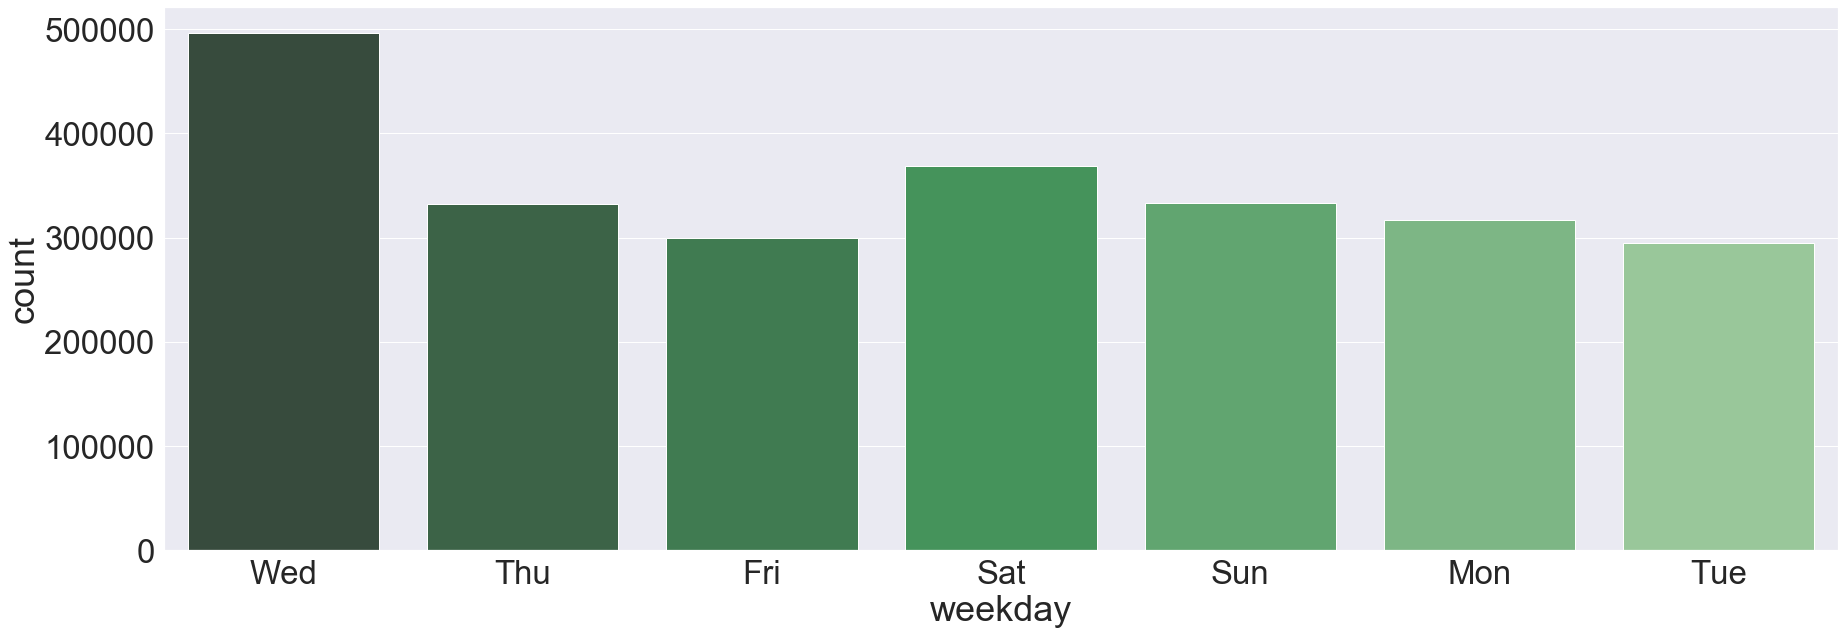

In [154]:
#Visualize the time published by tweet
#Wednesday with the most data is because there is a two-week Wednesday for the date of dataset, so there are more data samples.
#Post tweets on weekends a little more than weekdays
%matplotlib inline
plt.figure(figsize=(30,10))
# data_03_04.weekday.value_counts().plot.bar(fontsize=30)
# plt.show()
sns.set(font_scale=3)
sns.countplot(x='weekday', data=data_03_04, palette="Greens_d")
plt.show()

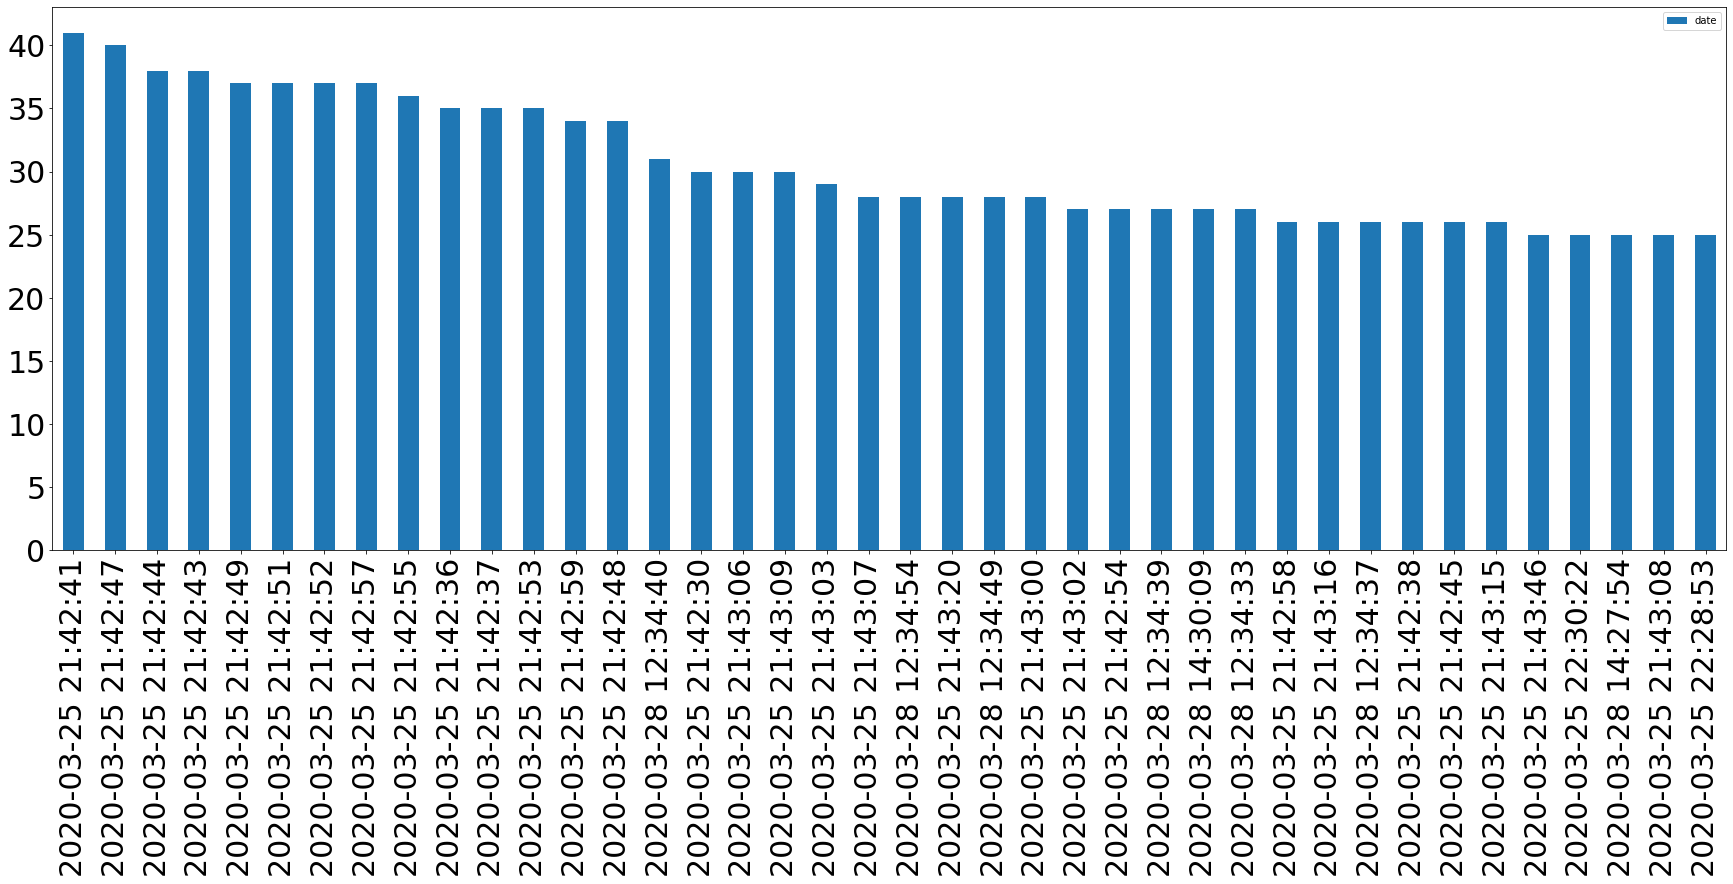

In [153]:
#Found that most tweets are released around 9pm
time_counts = data_03_04.date.value_counts()
plt.figure(figsize=(30,10))
time_counts[0:40].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [152]:
#The number represents the emotional bias of the tweet, and the smaller the number, the more negative the emotion
data_03_04.score.value_counts()

1.0    526496
2.0     71344
3.0     17601
0.0      6777
4.0       135
Name: score, dtype: int64

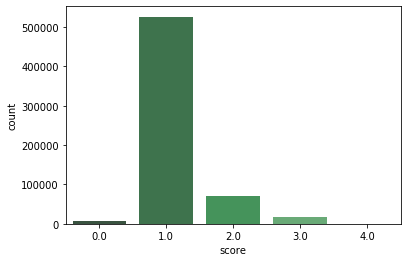

In [151]:
sns.countplot(x='score', data=data_03_04, palette="Greens_d")
plt.show()

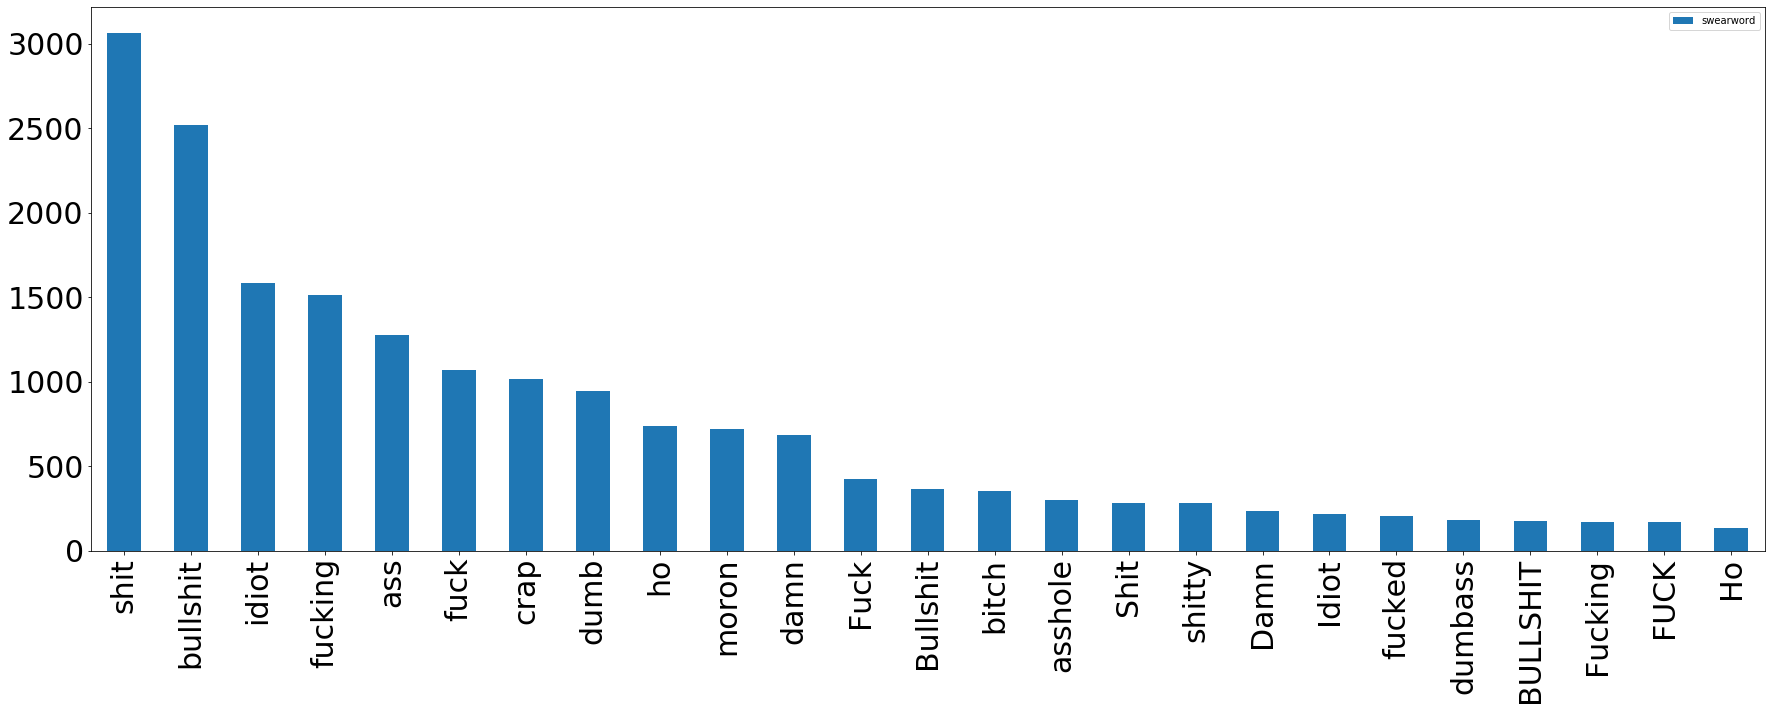

In [149]:
#Statistics about negative words in swearword
plt.figure(figsize=(30,10))
swearword_counts = data_03_04.swearword.value_counts()
swearword_counts[0:25].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [150]:
swearword_counts[364:]

on had                               1
dickface                             1
Bitchy                               1
ASSCLOWN                             1
cocksucker                           1
dickweed                             1
BOLLOCKS                             1
butt plug                            1
Fuckwit                              1
boner                                1
dumass                               1
crap MSNBC and fake news networks    1
dickbag                              1
Twats                                1
hard-on                              1
fatass                               1
FUCKOFF                              1
Clit                                 1
Faggot                               1
harder on                            1
Name: swearword, dtype: int64

In [147]:
#Sorting and data visualization of users with a relatively large number of tweets
users = data_03_04.user_id.value_counts()
users[0:20]

886721547481874432     712
1178508394941931522    577
880757915132588032     450
840496870875045889     446
962764981627473921     441
1101112957453271041    403
899115298997055491     399
19046214               312
939209002357067778     293
22081328               286
241211904              282
801657973              275
1187981814402551808    270
1163467159919636481    266
1216904386053468160    257
553668770              244
871787039846486016     242
907857255613321217     219
843823100567289856     211
1233913459722637312    204
Name: user_id, dtype: int64

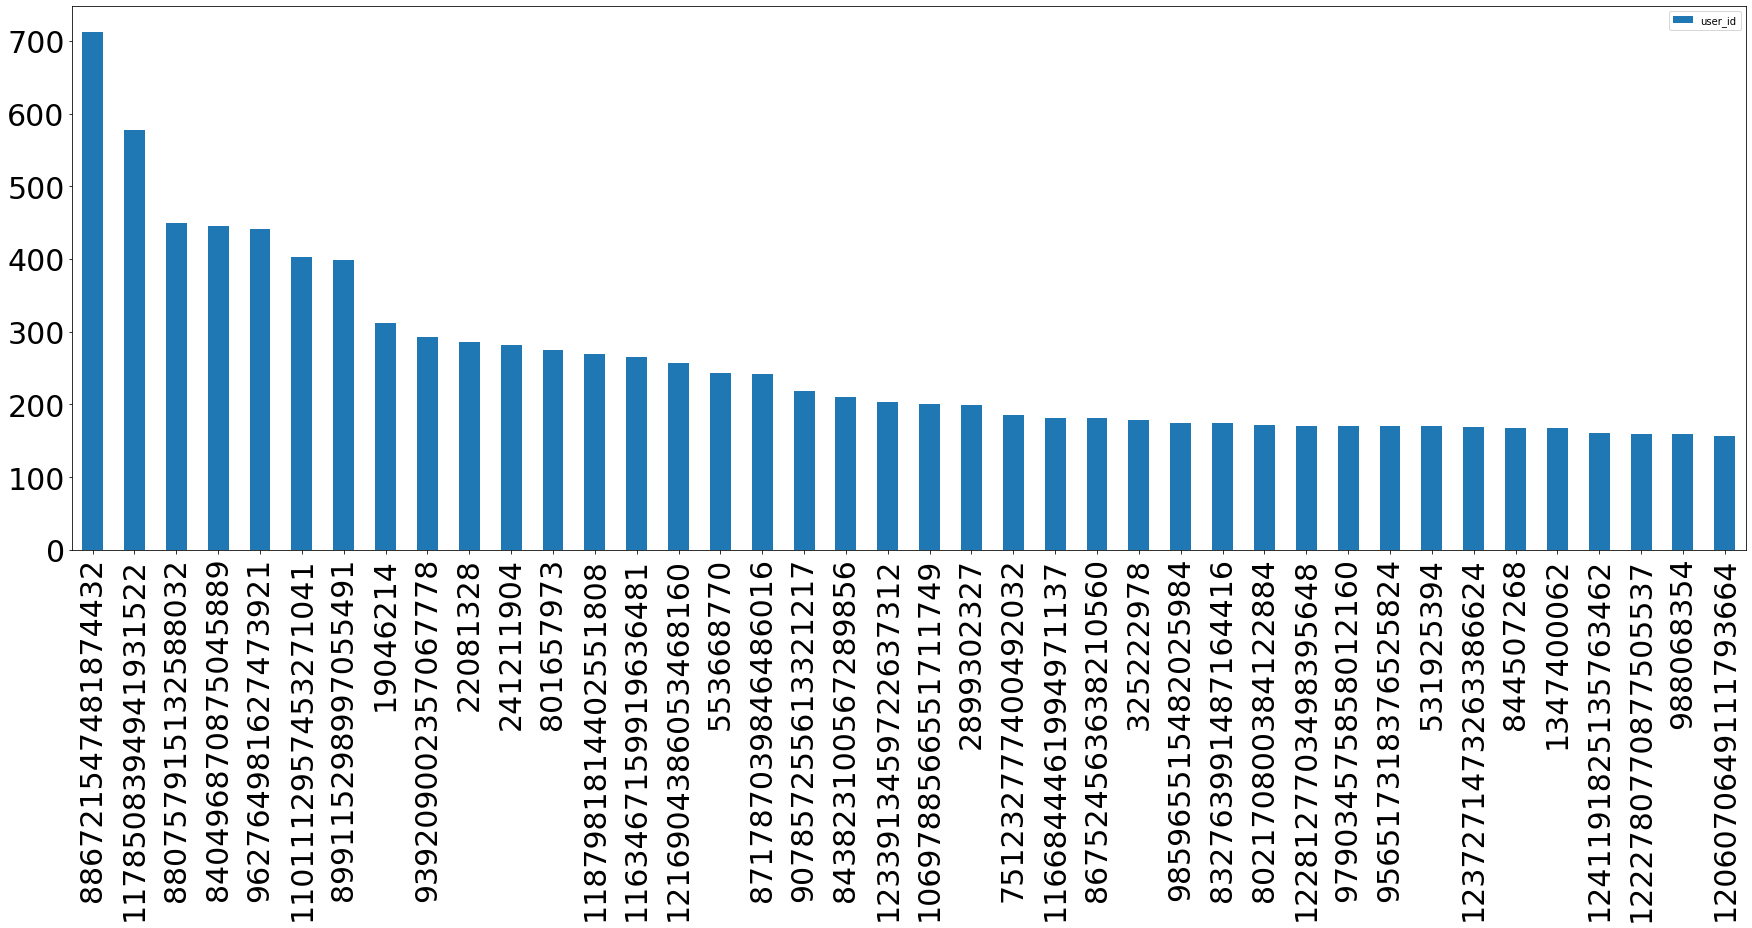

In [148]:
plt.figure(figsize=(30,10))
users[0:40].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [144]:
#Collect data about usersinfo
userinfo = data_03_04[['user_id','user_location','user_friends_count','user_favourites_count','user_followers_count']].sort_values('user_followers_count',ascending = False)

In [145]:
userinfo[0:20]

,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count
1019897,25073877,"Washington, DC",47,6,75323351
1057731,25073877,"Washington, DC",47,6,75313313
1057739,25073877,"Washington, DC",47,6,75313309
1224268,25073877,"Washington, DC",47,6,75304452
1156563,25073877,"Washington, DC",47,6,75298474
40188,25073877,"Washington, DC",47,6,75145635
145186,25073877,"Washington, DC",47,7,75093879
2391853,759251,NaN,1107,1432,46613482
2167485,759251,NaN,1107,1432,46568711
1237441,759251,NaN,1107,1432,46432908


In [143]:
#View tweets posted by a user individually
lista = data_03_04[['text','score']][(data_03_04.user_id ==25073877)]
#See what the user said in tweet
for i in lista.text:
    print(i)
    print('-----------------------------------')

I hear that Fake News CNN just reported that I am isolated in the White House, wondering out loud, “when will life return to normal?” Does anybody really believe that? There was no leak, they made it up – they are CORRUPT &amp; FAKE NEWS....
-----------------------------------
I am working very hard to help New York City &amp; State. Dealing with both Mayor &amp; Governor and producing tremendously for them, including four new medical centers and four new hospitals. Fake News that I won’t help them because I don’t like Cuomo (I do). Just sent 4000 ventilators!
-----------------------------------
....very often FAKE NEWS. Lamestream Media should be forced to reveal sources, very much as they did in the long ago past. If they did that, the media would be trusted again, and Fake News would largely be a thing of the past!
-----------------------------------
....very often FAKE NEWS. Lamestream Media should be forced to reveal sources, very much as they did in the long ago past. If they did

# Step-4 Separate storage and processing of text data
1.Save the data after  Pre-processing as a file

2.Text processing in pandas dataset

3.After processing, the old text data CSV file is overwritten（Avoid repeated operations when opening the file next time）

In [102]:
#read tweet data csv file
data_03_04 = pd.read_csv('data_03_04.csv')
data_03_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442674 entries, 0 to 2442673
Data columns (total 18 columns):
tweet_id                 int64
tweet_lang               object
text                     object
user_id                  int64
user_location            object
user_friends_count       int64
user_favourites_count    int64
user_followers_count     int64
weekday                  object
date                     object
swearword                object
score                    float64
Very positive            float64
Positive                 float64
Neutral                  float64
Very negative            float64
Negative                 float64
url                      object
dtypes: float64(6), int64(5), object(7)
memory usage: 335.5+ MB


In [104]:
data_03_04.head(2)

,tweet_id,tweet_lang,text,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,weekday,date,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,url
0,1242964476669898754,en,@marlenelooney You're wrong. I can tell becaus...,811230404372004868,"Oklahoma, USA",984,9990,895,Wed,2020-03-25 23:59:59,NaN,2.0,0.043135,0.368584,0.264543,0.055434,0.268304,https://twitter.com/i/web/status/1242964476669...
1,1242964477974319104,en,RT @realDonaldTrump: I hear that Fake News CNN...,22478091,NaN,928,100586,777,Wed,2020-03-25 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
text_03_04 = data_03_04[['tweet_id','text']]

In [111]:
text_03_04.head(2)

,tweet_id,text
0,1242964476669898754,@marlenelooney You're wrong. I can tell becaus...
1,1242964477974319104,RT @realDonaldTrump: I hear that Fake News CNN...


In [119]:
# Count characters
text_03_04['word_count'] = text_03_04['text'].apply(lambda x:len(x.split(' ')))
text_03_04[['text','word_count']].head()

,text,word_count
0,@marlenelooney You're wrong. I can tell becaus...,53
1,RT @realDonaldTrump: I hear that Fake News CNN...,25
2,RT @LizRNC: Very important point from Dr. Birx...,21
3,RT @HarbirSinghNain: China is pressuring India...,19
4,RT @maddow: Do not amplify misinformation.\n\n...,19


In [114]:
# Statistical stop words
from nltk.corpus import stopwords
stop=stopwords.words('english')
text_03_04['stopwords']=text_03_04['text'].apply(lambda sen:len([x for x in sen.split() if x in stop]))
text_03_04[['text','stopwords']].head()

,text,stopwords
0,@marlenelooney You're wrong. I can tell becaus...,22
1,RT @realDonaldTrump: I hear that Fake News CNN...,8
2,RT @LizRNC: Very important point from Dr. Birx...,5
3,RT @HarbirSinghNain: China is pressuring India...,6
4,RT @maddow: Do not amplify misinformation.\n\n...,5


In [120]:
text_03_04.head()

,tweet_id,text,stopwords,word_count
0,1242964476669898754,@marlenelooney You're wrong. I can tell becaus...,22,53
1,1242964477974319104,RT @realDonaldTrump: I hear that Fake News CNN...,8,25
2,1242964479622725634,RT @LizRNC: Very important point from Dr. Birx...,5,21
3,1242964480352333824,RT @HarbirSinghNain: China is pressuring India...,6,19
4,1242964480020975616,RT @maddow: Do not amplify misinformation.\n\n...,5,19


In [121]:
#Save these textinfo statistics as a csv file
text_03_04.to_csv('text_03_04.csv',index=False)

# The processing of tweet text data includes：
1.the conversion of lowercase letters

2.deletion of @user and RT from each tweet

3.deletion of words with a length of less than 3

4.Delete punctuation

5.removal of stop words

6.The part of speech reduction 

7.word segmentation and Part-of-speech tagging

In [3]:
#Read the Tweet Text data again
os.chdir(r'D:\dataset\clear_data')
text_03_04 = pd.read_csv('text_03_04.csv')
text_03_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442674 entries, 0 to 2442673
Data columns (total 4 columns):
tweet_id      int64
text          object
stopwords     int64
word_count    int64
dtypes: int64(3), object(1)
memory usage: 74.5+ MB


In [4]:
len(text_03_04)

2442674

In [5]:
# Filter out some useless handles
import re
reg_map = {
    re.compile("rt [@0-9a-z_]{0,10}:"),
    re.compile("[a-zA-z]+://[^\s]*"),
    re.compile('http|htttps…'),
    re.compile('[a-z]*[:.]+\S+'),
    re.compile("@[0-9a-z]+"),
    re.compile("RT[\s]+"),
    re.compile("#"),
    re.compile('https?:\/\/\S+'),
}
def lower_and_remove_with_reg(text: str) -> str:
    text = text.lower()
    for v in reg_map:
        text = v.sub("", text)
    return text

In [6]:
# Filter out some useless handles
text_03_04['text']=text_03_04['text'].apply(lower_and_remove_with_reg)
text_03_04['text'].head()

0     you're wrong. i can tell because you're a tru...
1     i hear that fake news cnn just reported that ...
2     very important point from dr. birx 👇\n\nmodel...
3     china is pressuring indian journalists to ped...
4     do not amplify misinformation.\n\nif someone ...
Name: text, dtype: object

In [7]:
text_03_04_http = text_03_04[text_03_04.text.str.contains(r'http')]
len(text_03_04_http)

0

In [8]:
# replaces periods with Spaces
text_03_04['text'] = text_03_04['text'].str.replace('[^a-zA-Z]', ' ') 
text_03_04['text'].head()

0     you re wrong  i can tell because you re a tru...
1     i hear that fake news cnn just reported that ...
2     very important point from dr  birx    models ...
3     china is pressuring indian journalists to ped...
4     do not amplify misinformation   if someone is...
Name: text, dtype: object

In [9]:
#Delete the short term
text_03_04['text']=text_03_04['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
text_03_04['text'].head()

0    wrong tell because trump hater democrat that t...
1    hear that fake news just reported that isolate...
2    very important point from birx models with zer...
3    china pressuring indian journalists peddle chi...
4    amplify misinformation someone consistently hy...
Name: text, dtype: object

In [10]:
# Remove stop words
from nltk.corpus import stopwords
stop=stopwords.words('english')
text_03_04['text']=text_03_04['text'].apply(lambda sen:" ".join(x for x in sen.split() if x not in stop))
text_03_04['text'].head()

0    wrong tell trump hater democrat tells need kno...
1    hear fake news reported isolated white house w...
2    important point birx models zero controls lead...
3    china pressuring indian journalists peddle chi...
4    amplify misinformation someone consistently hy...
Name: text, dtype: object

In [11]:
# #词干提取
# from nltk.stem import PorterStemmer
# st=PorterStemmer()
# text_03_04['text'] = text_03_04['text'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))
# text_03_04['text'].head()

In [12]:
#Part of speech reduction
from textblob import Word
text_03_04['text'] = text_03_04['text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
text_03_04['text'].head()

0    wrong tell trump hater democrat tell need know...
1    hear fake news reported isolated white house w...
2    important point birx model zero control lead i...
3    china pressuring indian journalist peddle chin...
4    amplify misinformation someone consistently hy...
Name: text, dtype: object

In [13]:
#Delete handle
#Participle
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
text_03_04['word']=text_03_04['text'].apply(tknzr.tokenize)
text_03_04['word'].head()

0    [wrong, tell, trump, hater, democrat, tell, ne...
1    [hear, fake, news, reported, isolated, white, ...
2    [important, point, birx, model, zero, control,...
3    [china, pressuring, indian, journalist, peddle...
4    [amplify, misinformation, someone, consistentl...
Name: word, dtype: object

In [14]:
# Part-of-speech tagging
from nltk import pos_tag
from nltk import word_tokenize
def get_pos(text):
    token = word_tokenize(text)
    word = (pos_tag(token))
    return word

In [15]:
text_03_04['text_tag']=text_03_04['text'].apply(get_pos)
text_03_04.head()

,tweet_id,text,stopwords,word_count,word,text_tag
0,1242964476669898754,wrong tell trump hater democrat tell need know...,22,53,"[wrong, tell, trump, hater, democrat, tell, ne...","[(wrong, JJ), (tell, NN), (trump, NN), (hater,..."
1,1242964477974319104,hear fake news reported isolated white house w...,8,25,"[hear, fake, news, reported, isolated, white, ...","[(hear, JJ), (fake, JJ), (news, NN), (reported..."
2,1242964479622725634,important point birx model zero control lead i...,5,21,"[important, point, birx, model, zero, control,...","[(important, JJ), (point, NN), (birx, NN), (mo..."
3,1242964480352333824,china pressuring indian journalist peddle chin...,6,19,"[china, pressuring, indian, journalist, peddle...","[(china, NN), (pressuring, VBG), (indian, JJ),..."
4,1242964480020975616,amplify misinformation someone consistently hy...,5,19,"[amplify, misinformation, someone, consistentl...","[(amplify, VB), (misinformation, NN), (someone..."


In [16]:
#save the text mining data as a new csv file
text_03_04.to_csv('text_03_04_mining.csv')

In [17]:
#Read the CSV file again for check 
text_03_04_mining = pd.read_csv('text_03_04_mining.csv')
text_03_04_mining.head()

,Unnamed: 0,tweet_id,text,stopwords,word_count,word,text_tag
0,0,1242964476669898754,wrong tell trump hater democrat tell need know...,22,53,"['wrong', 'tell', 'trump', 'hater', 'democrat'...","[('wrong', 'JJ'), ('tell', 'NN'), ('trump', 'N..."
1,1,1242964477974319104,hear fake news reported isolated white house w...,8,25,"['hear', 'fake', 'news', 'reported', 'isolated...","[('hear', 'JJ'), ('fake', 'JJ'), ('news', 'NN'..."
2,2,1242964479622725634,important point birx model zero control lead i...,5,21,"['important', 'point', 'birx', 'model', 'zero'...","[('important', 'JJ'), ('point', 'NN'), ('birx'..."
3,3,1242964480352333824,china pressuring indian journalist peddle chin...,6,19,"['china', 'pressuring', 'indian', 'journalist'...","[('china', 'NN'), ('pressuring', 'VBG'), ('ind..."
4,4,1242964480020975616,amplify misinformation someone consistently hy...,5,19,"['amplify', 'misinformation', 'someone', 'cons...","[('amplify', 'VB'), ('misinformation', 'NN'), ..."


In [18]:
text_03_04_mining.text.isna().value_counts()

False    2442484
True         190
Name: text, dtype: int64